# GFER Live Cells (more live 1 and 2)
_Maydan Wienreb_
<img src="https://raw.githubusercontent.com/maydanw/InEasyReach/master/hr-brian-litzinger-one.png" alt="Drawing" style="width: 100%; height: 60px" />

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Imports


In [2]:
"""
This will enable completion on elements of lists, results of function calls, etc.
However, be warned that enabling this option can be unsafe, because the code is actually evaluated upon hitting TAB
"""
%config IPCompleter.greedy=True

from typing import Dict, Tuple, List

# import numpy
import numpy as np
np.random.seed(0) # Remmeber to reset the seed every time if you expect the second draw to be the same as the first.

#import pandas
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import graphics
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
import seaborn as sns
sns.set_style("whitegrid")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# %load_ext autoreload
# %autoreload 1
# %aimport TestFunctions
## See: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html


In [3]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

# Do run in the first time: jupyter nbextension enable --py --sys-prefix widgetsnbextension

Loading BokehJS ...

In [4]:
import types
import sys
print ("Basic packages versions:")
print ("   Python version: %s" % (sys.version))
print ("   Packages:")


try:  
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))
except: 
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))

Basic packages versions:
   Python version: 3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]
   Packages:
   json: 2.0.9
   numpy: 1.15.0
   pandas: 0.23.3
   seaborn: 0.9.0


# General

In [5]:
patients = {"AV": {'age': 6*4, "gender": "M", "color": "cornflowerblue"}, 
            "EV": {"age": 5.5*12*4, "gender": "F", "color": "violet"},
            "HC CM": {"age": 6*12*4, "gender": "F", "color": "green"},
            "AG044": {"age": 15, "gender": "F", "color": "limegreen"},
            "AG015": {"age": 3/7, "gender": "M", "color": "cyan"},
            "HV": {"age": 37*12*4, "gender": "F", "color": "darkviolet"},
            "MV": {"age": 36.5*12*4, "gender": "M", "color": "royalblue"},
            "HC IK": {"age": 32*12*4, "gender": "F", "color": "gray"},
            "HC OZ": {"age": 35*12*4, "gender": "M", "color": "yellow"},
            "HC NA0730":{"age": 53*12*4, "gender": "M", "color": "coral"}}
patients_df = pd.DataFrame(patients).T
patients_df


age           color gender
AV               24  cornflowerblue      M
EV              264          violet      F
HC CM           288           green      F
AG044            15       limegreen      F
AG015      0.428571            cyan      M
HV             1776      darkviolet      F
MV             1752       royalblue      M
HC IK          1536            gray      F
HC OZ          1680          yellow      M
HC NA0730      2544           coral      M

In [6]:
from scipy.stats import mannwhitneyu

def compare_results(df, base_key, feature_name, df_grpby_key='Prow', hyp_alternative="less"):
    df_grp_row = df.groupby(df_grpby_key)
    base_data = df_grp_row[feature_name].get_group(base_key)

    p_values = {}
    for grp_k in df_grp_row[feature_name].groups.keys():
        if grp_k==base_key:
            continue
        p_data = df_grp_row[feature_name].get_group(grp_k)
        stat, p = mannwhitneyu(base_data, p_data, alternative=hyp_alternative)
        p_values[grp_k] = p
    return p_values

In [7]:
def pval_corrected(pvals_raw, method=None):
    '''p-values corrected for multiple testing problem
 
    This uses the default p-value correction of the instance stored in
    ``self.multitest_method`` if method is None.
 
    '''
    import statsmodels.stats.multitest as smt
    if method is None:
        method = 'Bonferroni'
    #TODO: breaks with method=None
    return smt.multipletests(pvals_raw, method=method)[1]

# Load Live Cells Data

In [8]:
data_path1 = ".\\Data\\20181120\\more live 1 - adults.XLS"
data_path2 = ".\\Data\\20181120\\more live 2 - adults.XLS" # This plate was seeded a day after plate 1

In [9]:
# read the data from the file
df_live1 = pd.read_excel(data_path1, sheet_name='Nuc_cell_TMRE_MITOTRACKER', header=1)
df_live1["Plate"] = 1
df_live2 = pd.read_excel(data_path2, sheet_name='Nuc_cell_TMRE_MITOTRACKER', header=1)
df_live2["Plate"] = 2
df_live = pd.concat([df_live1,df_live2])

print(df_live1.shape)
print(df_live2.shape)
print(df_live.shape)

del df_live1
del df_live2

(9926, 50)
(18062, 50)
(27988, 50)


In [10]:
# remove redundent column
df_live.drop("Target",axis=1, inplace=True)

# extract the positional data 
loc_df = df_live.Section.str.extract("(.*) - (.*) \(fld (.*)\).*",expand=True)
loc_df.columns=["Prow","Pcol", "Pfield"]
loc_df.Pcol = loc_df.Pcol.astype(np.int16)
df_live = pd.concat([df_live, loc_df], axis=1)
df_live.drop("Section",axis=1, inplace=True)

# replace rows with patients names and join patients data
col_map = {2:"HV", 3:"HV", 4:"HC IK", 5:"HC IK", 6:"MV", 7:"MV", 8:"HC OZ", 9:"HC OZ", 10:"HC 0730", 11:"HC 0730", 12:"AG015"}
mapping_series = pd.Series(list(col_map.values()), index=list(col_map.keys()))
df_live["patient"] = df_live["Pcol"].map(mapping_series)
df_live = df_live.join(patients_df, on='patient')

In [11]:
df_live = df_live[df_live["Prow"]!='G']

In [429]:
df_live.describe()

TMRE AREA     TMRE POS X     TMRE POS Y  TMRE INTENSITY  TMRE FORM FACTOR    TMRE COUNT      TMRE DxA  TMRE mean int  TMRE mean area  TMRE mean length  TMRE Sum Length  MITOTRECKER AREA     MITO POS Y  MITOTRACKER DxA  MITOTRACKER FORM FACTOR  MITOTRACKER INTENSITY  MITOTRACKER COUNT     MITO POS X  Mitotracker mean int  Mtiotracker mean area  Mitotracker mean length  Mitotracker Sum Length   NUCLEAR DXA      NUC CG X      NUC CG Y  NUC FORM FACTOR  NUC MEDIAN DENSITY  NUCLEAR PARIMETER  NUCLEAR WRMI  NUCLEUS MAX CHORD  NUCLEAR AVG DIAMETER  NUCLEAR MED DIAMETER  NUCLEAR AREA  NUCLEAR INTENSITY  CELL INTENSITY      CELL DXA     CELL AREA  CELL FORM FACTOR  CELL FIBER LENGTH  CELL END NODES  CELL PARIEMETER  CELL AVG  DIAMETER  CELL MED DIAMETER     CELL FRMI   CELL LENGTH  CELL CROSSING POINTS  CELL BRANCH NODES         Plate          Pcol
count  25995.000000   25995.000000   25995.000000    2.599500e+04      25995.000000  25995.000000  2.599500e+04   25995.000000    25995.000000      25995.000000     25995.000000      25995.000000   25995.000000     2.599500e+04             25995.000000           2.599500e+04       25995.000000   25995.000000          25995.000000           25995.000000             25995.000000            25995.000000  2.599500e+04  25995.000000  25995.000000     25995.000000        25995.000000       25995.000000  25995.000000       25995.000000          25995.000000          25995.000000  25995.000000       25995.000000    25995.000000  2.599500e+04  25995.000000      25995.000000       25995.000000    25995.000000     25995.000000        25995.000000       25995.000000  25995.000000  25995.000000          25995.000000       25995.000000  25995.000000  25995.000000
mean      97.399092   16636.068917   16444.508106    2.687228e+05          1.154263     50.363031  5.963902e+05    5669.372146        2.173347          1.196459        64.436308        532.273699   16098.451477     8.550617e+06                 1.030575           4.599246e+05          50.007655   16810.623159          14420.786033              19.526753                 3.376231              118.133816  2.609626e+05    329.729056    334.875202         0.860141         1239.293864          55.771966      1.014160          20.465967             20.241980             19.219255    212.218721        1227.973278     5992.909303  1.678504e+07   3225.313844          0.221003         455.804570       24.227467       473.288851           20.241980          19.219255      0.953202    142.740114              1.382304          17.867167      1.654818      7.038854
std      183.646292   19486.001636   18747.332820    2.695794e+05          0.134890     50.789000  1.188642e+06     511.313297        7.693008          0.851904        68.824847        413.776838   14793.129739     7.674273e+06                 0.095182           3.626165e+05          39.689930   16525.127778           5016.814945              36.908426                 4.469024               72.946053  1.124509e+05    155.211645    153.637829         0.132859          484.578269           8.568746      0.274566           3.535729              9.960303             11.243358     53.279876         482.697432     2627.204391  9.900577e+06   2304.477064          0.135343         296.802259       19.009593       236.320117            9.960303          11.243358      0.223154     61.399223              2.356872          15.184584      0.475437      2.855330
min        0.106000      18.200000      24.050000    5.000000e+03          0.140000      1.000000  5.281330e+02    5000.000000        0.106000          0.325000         0.325000          0.106000      19.013000     8.464910e+02                 0.044000           8.014000e+03           1.000000      22.103000           8014.000000               0.106000                 0.325000                0.325000  9.574944e+03      5.281000      6.468000         0.133000           86.000000          33.478000      0.277000          11.476000              2.600000      

## Cells count

In [430]:
cell_for_patients = df_live.groupby(["patient"])["Pfield"].count()
display(cell_for_patients)
fig, ax = plt.subplots(figsize=(10,6)) 
cell_for_patients.plot(kind='bar')

patient
AG015       819
HC 0730    5567
HC IK      4722
HC OZ      5927
HV         3751
MV         5209
Name: Pfield, dtype: int64

In [431]:
cell_in_well = df_live[df_live.Plate==1].groupby(["Prow", "Pcol"])["Pfield"].count()
cell_in_well = cell_in_well.unstack(level=-1)

cell_in_well = cell_in_well.rename(col_map, axis=1)

fig, ax = plt.subplots(figsize=(10,6)) 
display(sns.heatmap(cell_in_well, linewidths=0.5, ax=ax, annot=True, fmt="0.00f"))

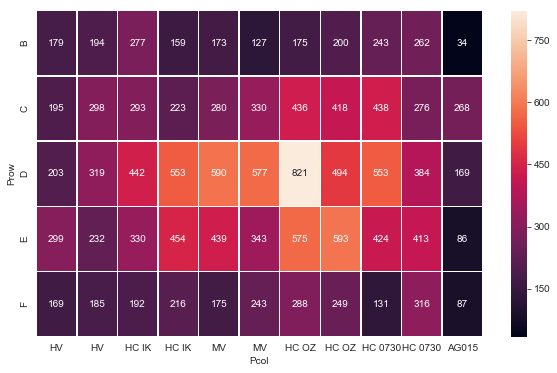

In [432]:
# cell_in_well = df_live[df_live.Plate==2].groupby(["Prow", "Pcol"])["Pfield"].count()
# cell_in_well = cell_in_well.unstack(level=-1)

# cell_in_well = cell_in_well.rename(col_map, axis=1)

# fig, ax = plt.subplots(figsize=(10,6)) 
# display(sns.heatmap(cell_in_well, linewidths=0.5, ax=ax, annot=True, fmt="0.00f"))


axes = plt.subplots(1, 3, figsize=(20,6))

for p,ax in zip(df_live.Plate.unique(), axes[1]):
    cell_in_well = df_live[df_live.Plate==p].groupby(["Prow", "Pcol"])["Pfield"].count()
    cell_in_well = cell_in_well.unstack(level=-1)

    cell_in_well = cell_in_well.rename(col_map, axis=1)

    display(sns.heatmap(cell_in_well, linewidths=0.5, ax=ax, annot=True, fmt="0.00f"))

Removing plate 2 row G as it looks weird

In [433]:
# df_live.loc[(df_live.Prow=='G') & (df_live.Plate==2)].shape
# df_live.loc[(df_live.Prow=='G') & (df_live.Plate==2)]=np.NAN
# df_live.dropna(inplace=True)

In [434]:
# cell_in_well = df_live.groupby(["Prow", "Pcol"])["Pfield"].count()
# cell_in_well = cell_in_well.unstack(level=-1)

# col_map = {2:"AV", 3:"AV", 4:"HC CM", 5:"HC CM", 6:"EV", 7:"EV", 8:"AG044", 9:"AG044", 10:"HV", 11:"HV", 12:"AG015"}
# cell_in_well = cell_in_well.rename(col_map, axis=1)

# fig, ax = plt.subplots(figsize=(10,6)) 
# sns.heatmap(cell_in_well, linewidths=0.5, ax=ax, annot=True, fmt="0.00f")

AG015 have only one column and fewer cells per column and therefore may not be relevant.  
Let's see if we see a relation between the number of cells in a well and the cells area?

Text(0,0.5,'Median of cells area')

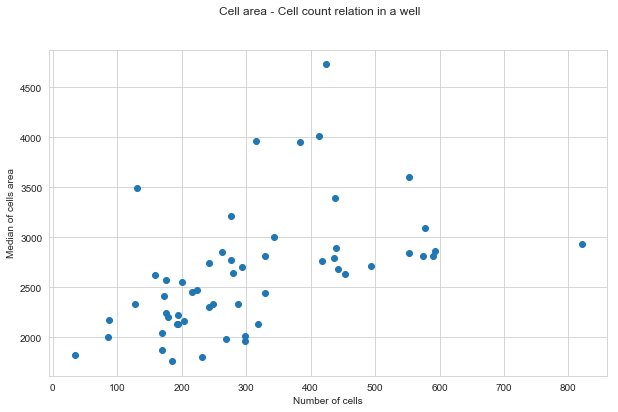

In [435]:
well_cell_area = df_live.groupby(["Prow", "Pcol"])["CELL AREA"].median()
well_cell_area = well_cell_area.unstack(level=-1)

well_cell_area = well_cell_area.rename(col_map, axis=1)

fig, ax = plt.subplots(figsize=(10,6)) 
# sns.heatmap(well_cell_area, linewidths=0.5, ax=ax, annot=True, fmt="0.00f")
plt.scatter(x=cell_in_well, y=well_cell_area)
fig.suptitle('Cell area - Cell count relation in a well')
plt.xlabel('Number of cells')
plt.ylabel('Median of cells area')

There seem to be no obvious relation.

# Correcting the data

In [14]:
len(df_live.Pcol.unique())

11

In [19]:
# Build the plate
plate_read_order = []
col_num = len(df_live.Pcol.unique())
for r in range(len(df_live.Prow.unique())):
    if r % 2 == 0:
        plate_read_order.append(list(range(1+(r*col_num),col_num+(r*col_num)+1)))
    else:
        plate_read_order.append(list(range(col_num+(r*col_num),(r*col_num),-1)))

plate_read_order_df = pd.DataFrame(plate_read_order)        
plate_read_order_df.set_index(df_live.Prow.unique(), inplace=True)
plate_read_order_df.columns=df_live.Pcol.unique()
plate_read_order_df

2   3   4   5   6   7   8   9   10  11  12
B   1   2   3   4   5   6   7   8   9  10  11
C  22  21  20  19  18  17  16  15  14  13  12
D  23  24  25  26  27  28  29  30  31  32  33
E  44  43  42  41  40  39  38  37  36  35  34
F  45  46  47  48  49  50  51  52  53  54  55

In [437]:
def get_reading_order(row, col):
    return plate_read_order_df.loc[row, col]

def get_row_col(read_order_value):
    return 1,1

def calc_change(df, col_name, show_plot=True):
    temp_df=pd.DataFrame()
    temp_df[col_name] = df[col_name]
    temp_df["read order"] = df.apply(lambda row: get_reading_order(row["Prow"], row["Pcol"]), axis=1)

    a,b = np.polyfit(temp_df["read order"], temp_df[col_name], 1)
    x = np.linspace(temp_df["read order"].min(),temp_df["read order"].max(), len(temp_df["read order"].unique()))
    y = x*a + b
    change_percent = (y[-1]-y[0])/y[0]
    if show_plot:
        plt.scatter(x=temp_df["read order"], y=temp_df[col_name])
        plt.plot(x,y, c='r')
        plt.suptitle(col_name)
        plt.show()
    
    return change_percent, (a,b)


In [438]:
df_live.columns

Index(['TMRE AREA', 'TMRE POS X', 'TMRE POS Y', 'TMRE INTENSITY', 'TMRE FORM FACTOR', 'TMRE COUNT', 'TMRE DxA', 'TMRE mean int', 'TMRE mean area', 'TMRE mean length', 'TMRE Sum Length', 'MITOTRECKER AREA', 'MITO POS Y', 'MITOTRACKER DxA', 'MITOTRACKER FORM FACTOR', 'MITOTRACKER INTENSITY', 'MITOTRACKER COUNT', 'MITO POS X', 'Mitotracker mean int', 'Mtiotracker mean area', 'Mitotracker mean length', 'Mitotracker Sum Length', 'NUCLEAR DXA', 'NUC CG X', 'NUC CG Y', 'NUC FORM FACTOR', 'NUC MEDIAN DENSITY', 'NUCLEAR PARIMETER', 'NUCLEAR WRMI', 'NUCLEUS MAX CHORD', 'NUCLEAR AVG DIAMETER', 'NUCLEAR MED DIAMETER', 'NUCLEAR AREA', 'NUCLEAR INTENSITY', 'CELL INTENSITY', 'CELL DXA', 'CELL AREA', 'CELL FORM FACTOR', 'CELL FIBER LENGTH', 'CELL END NODES', 'CELL PARIEMETER', 'CELL AVG  DIAMETER', 'CELL MED DIAMETER', 'CELL FRMI', 'CELL LENGTH', 'CELL CROSSING POINTS', 'CELL BRANCH NODES', 'Plate', 'Prow', 'Pcol', 'Pfield', 'patient', 'age', 'color', 'gender'], dtype='object')

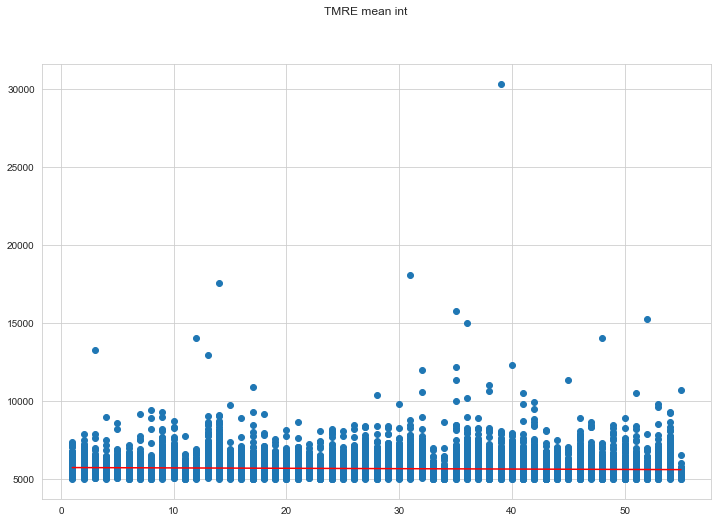

'TMRE mean int' change percent: -2.29%


'Mitotracker mean int' change percent: 22.47%
Correcting 'Mitotracker mean int' ...


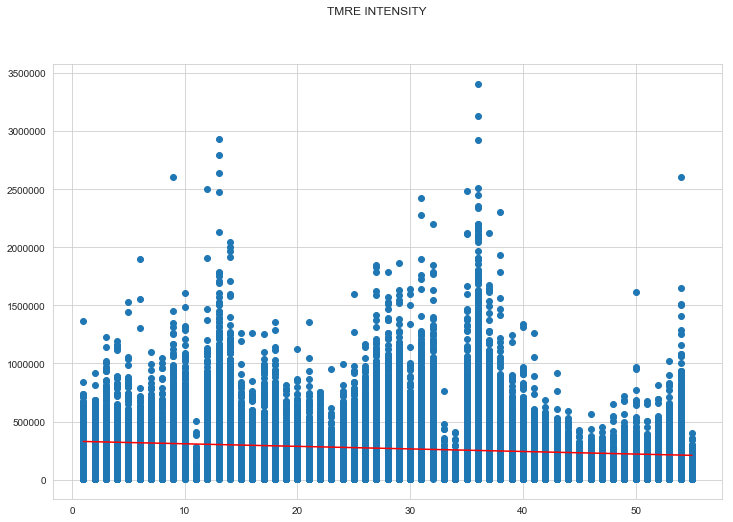

'TMRE INTENSITY' change percent: -36.35%
Correcting 'TMRE INTENSITY' ...


'MITOTRACKER INTENSITY' change percent: -26.58%
Correcting 'MITOTRACKER INTENSITY' ...


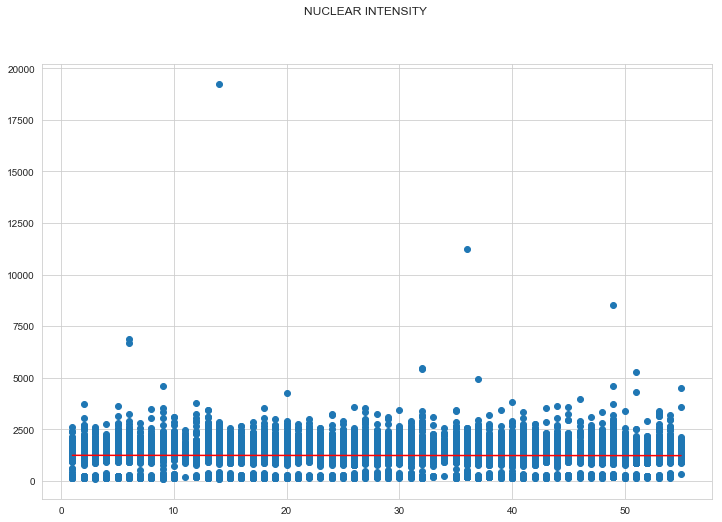

'NUCLEAR INTENSITY' change percent: -1.21%


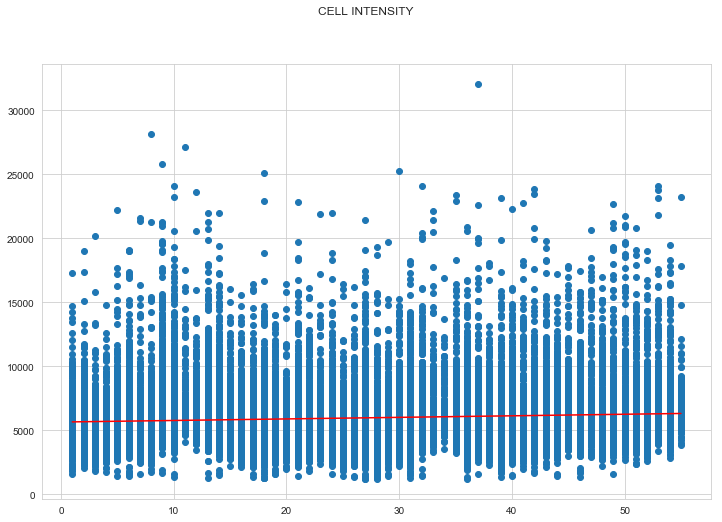

'CELL INTENSITY' change percent: 11.60%


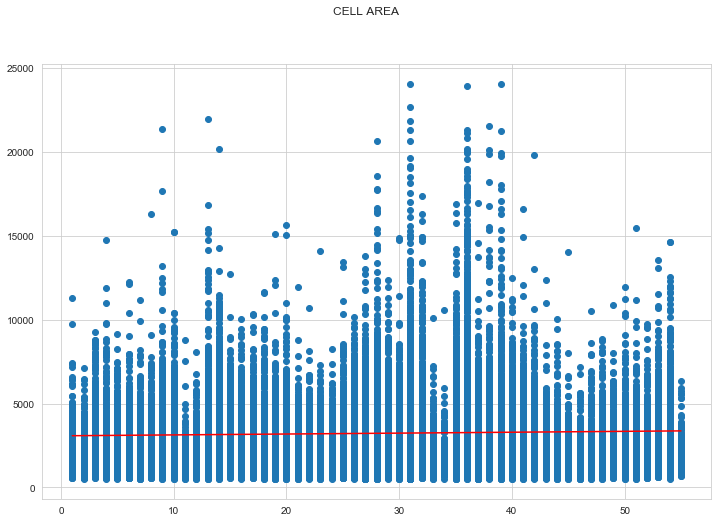

'CELL AREA' change percent: 9.31%


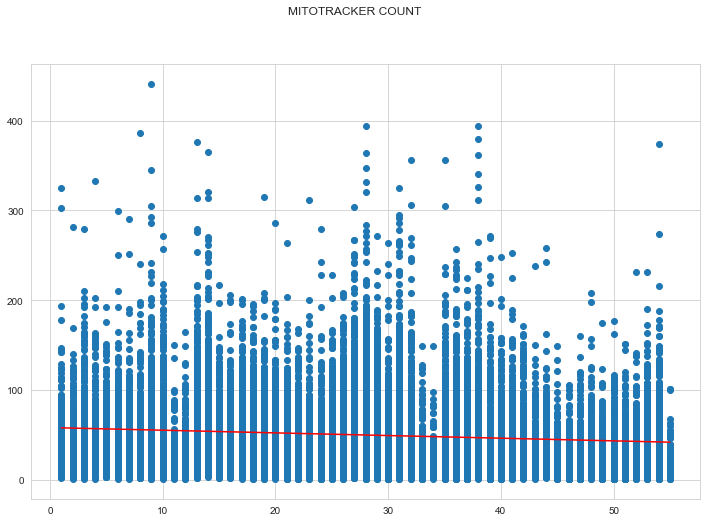

'MITOTRACKER COUNT' change percent: -27.56%
Correcting 'MITOTRACKER COUNT' ...


In [439]:
# columns_to_align = df_live.columns[df_live.columns.str.contains('int')].tolist() +df_live.columns[df_live.columns.str.contains('INTENSITY')].tolist()
columns_to_align = \
['TMRE mean int',
 'Mitotracker mean int',
 'TMRE INTENSITY',
 'MITOTRACKER INTENSITY',
 'NUCLEAR INTENSITY',
 'CELL INTENSITY',
 'CELL AREA',
'MITOTRACKER COUNT']

for col in columns_to_align:
    change_percent,(slope,intercept) = calc_change(df_live, col)
    print(f"\'{col}\' change percent: {change_percent*100:0.2f}%")
    if abs(change_percent)>0.2:
        print(f"Correcting \'{col}\' ...")
        df_live[col+"_Corrected"] = df_live[col]-df_live.loc[:,["Prow", "Pcol"]].apply(lambda row: get_reading_order(row["Prow"], row["Pcol"]), axis=1)*slope


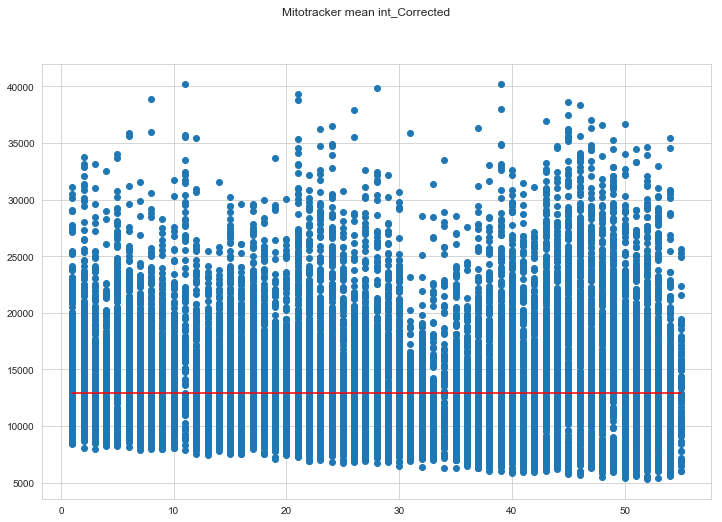

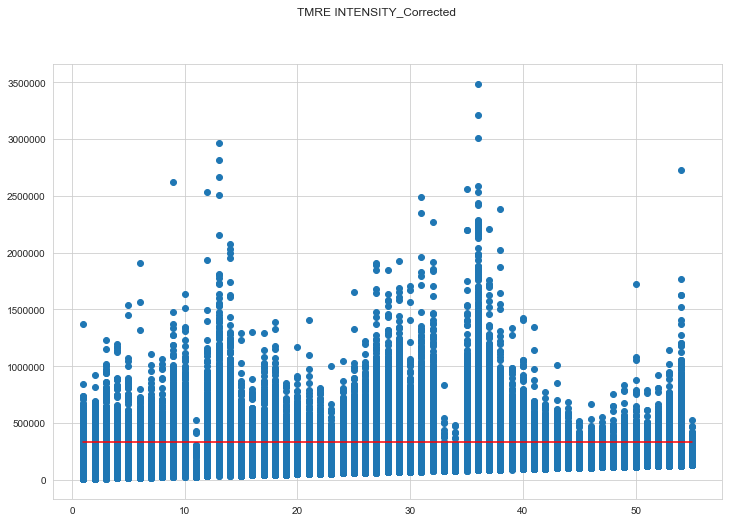

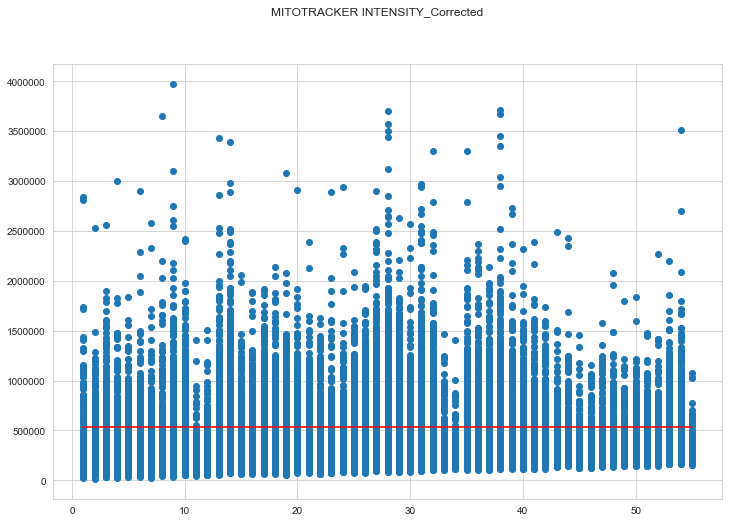

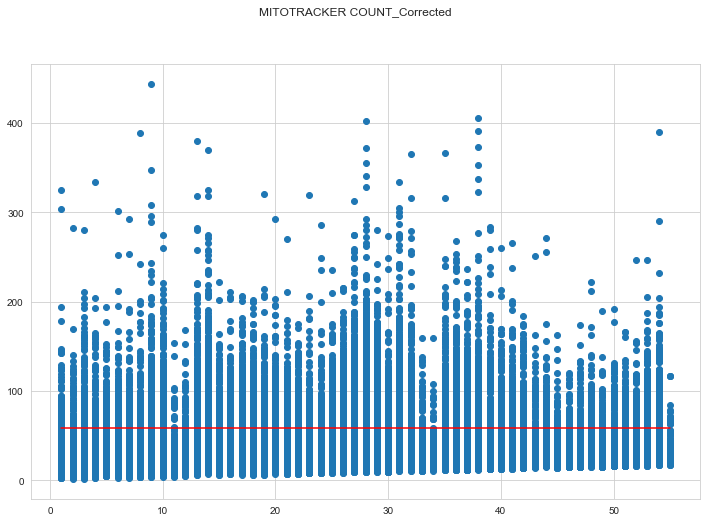

In [440]:
columns_to_align = df_live.columns[df_live.columns.str.contains('_Corrected')].tolist()

for col in columns_to_align:
    change_percent,(slope,intercept) = calc_change(df_live, col)

# Features by patients

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


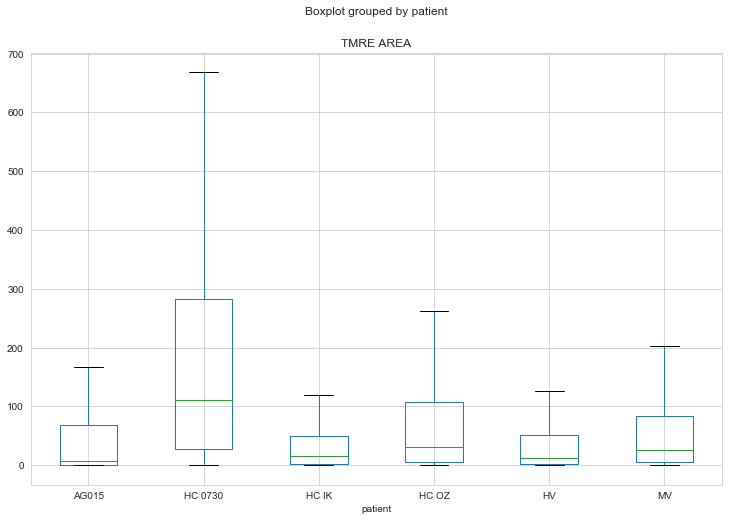

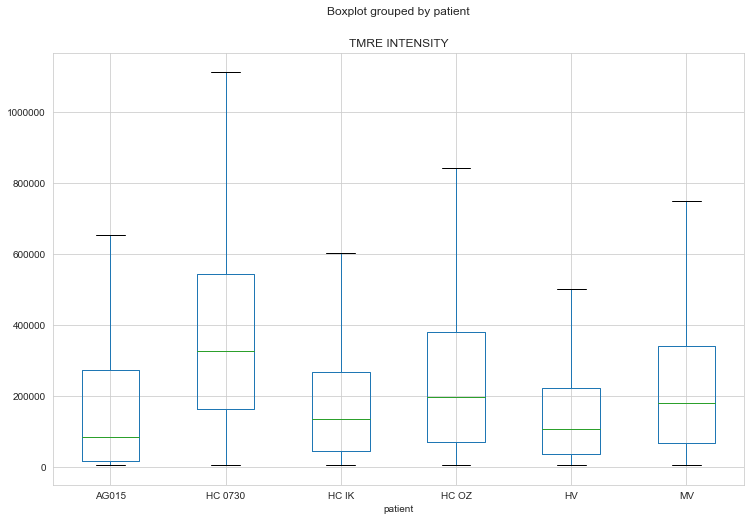

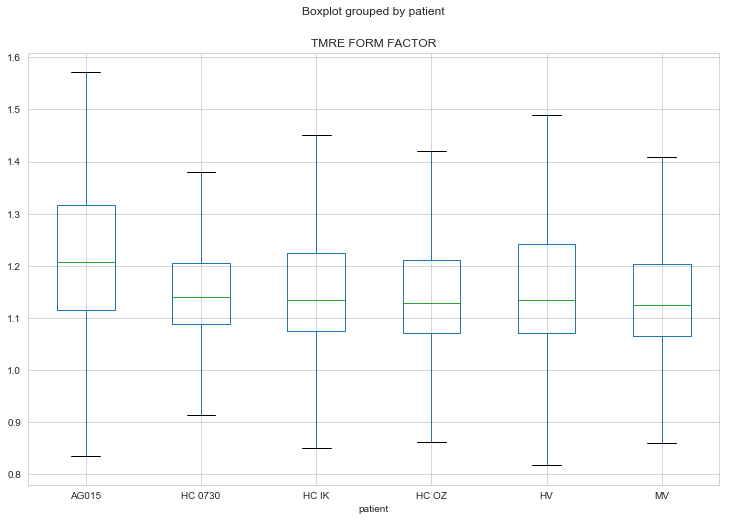

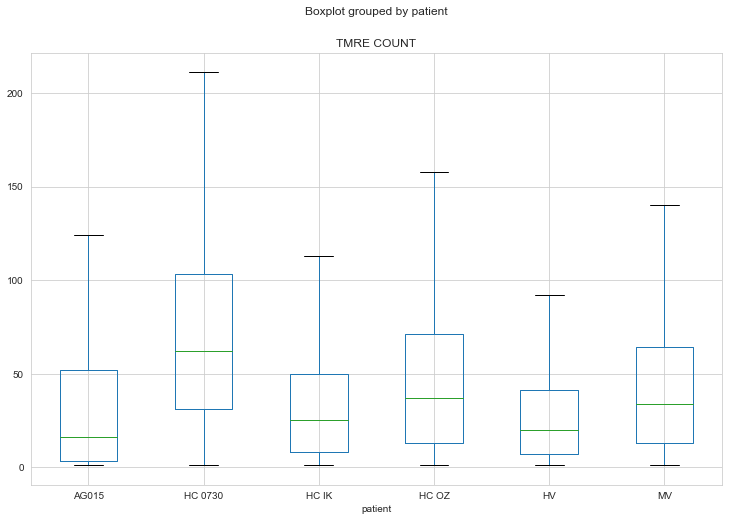

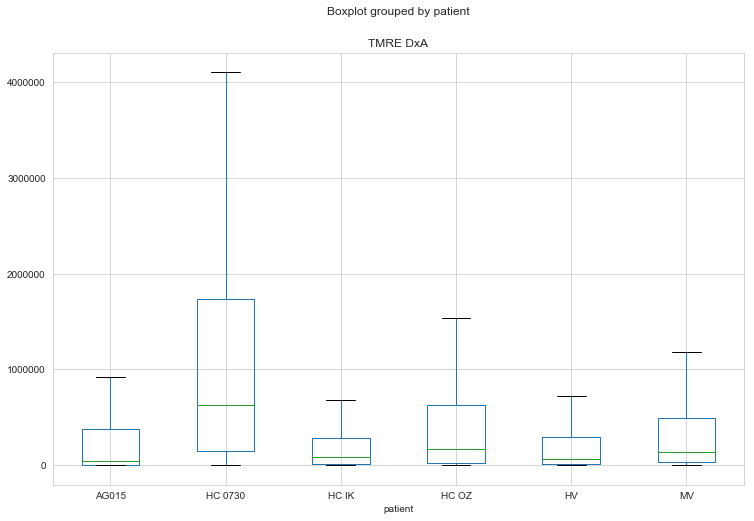

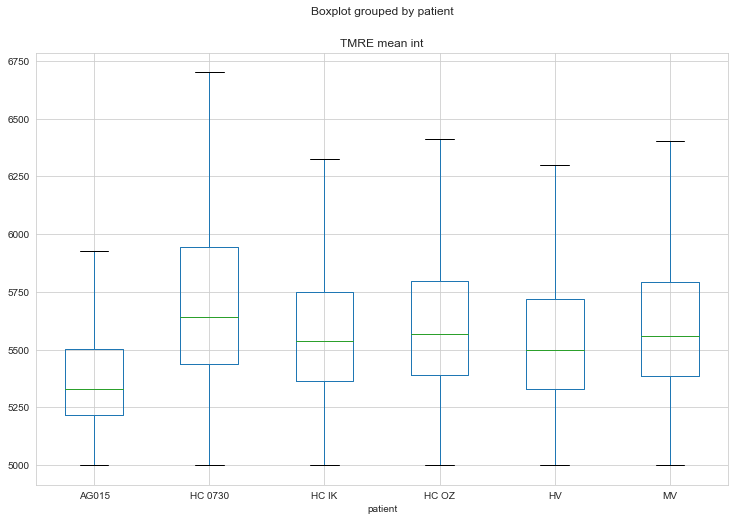

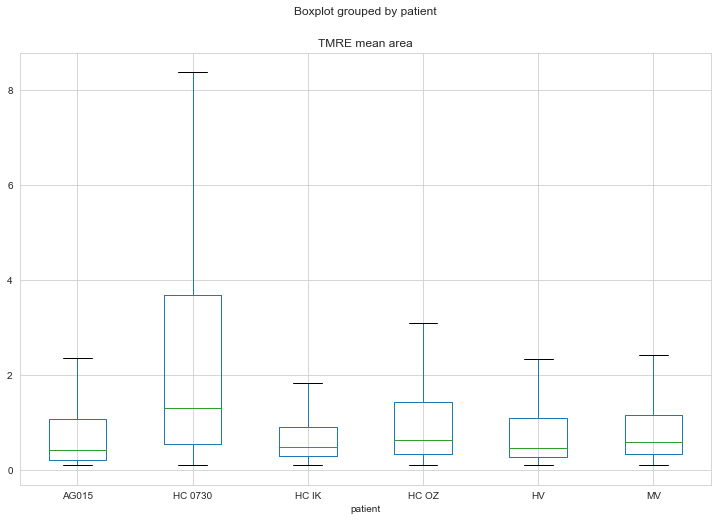

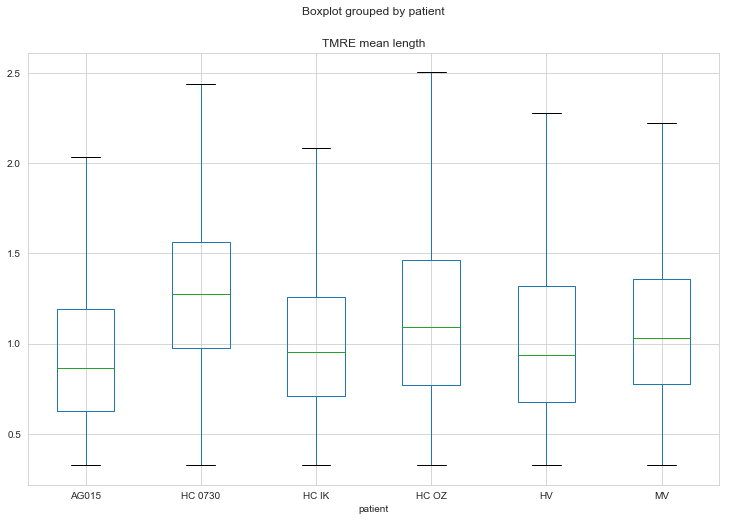

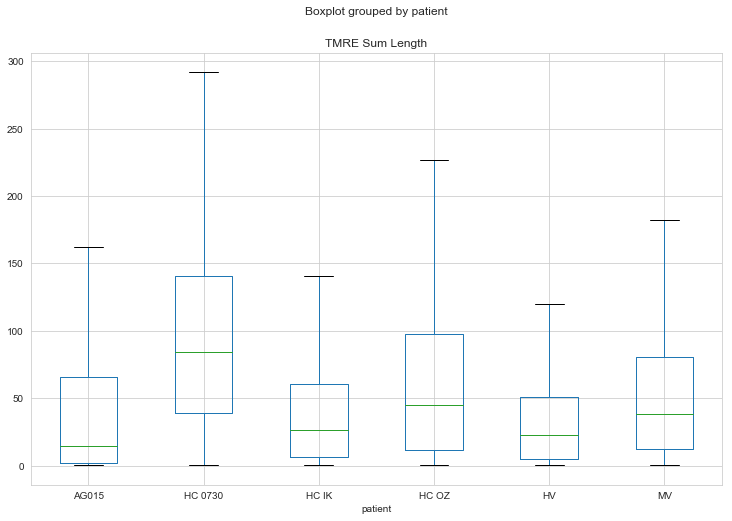

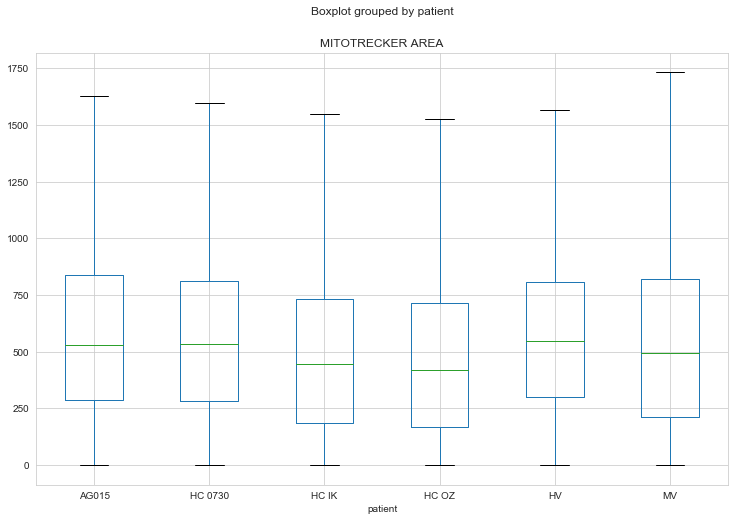

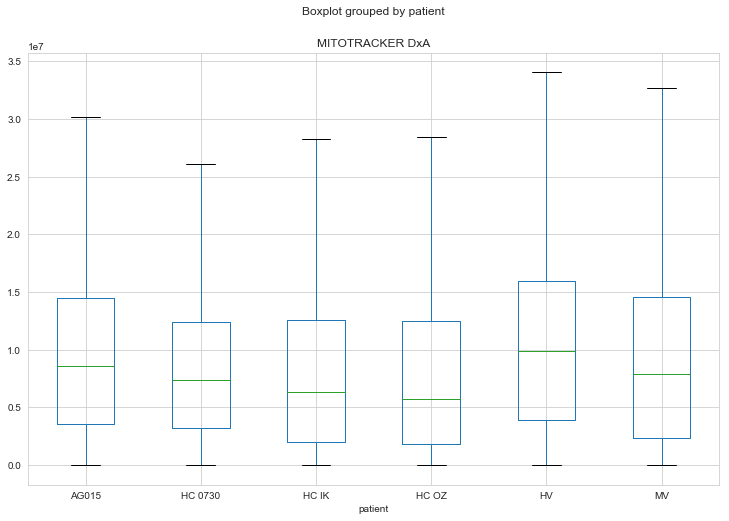

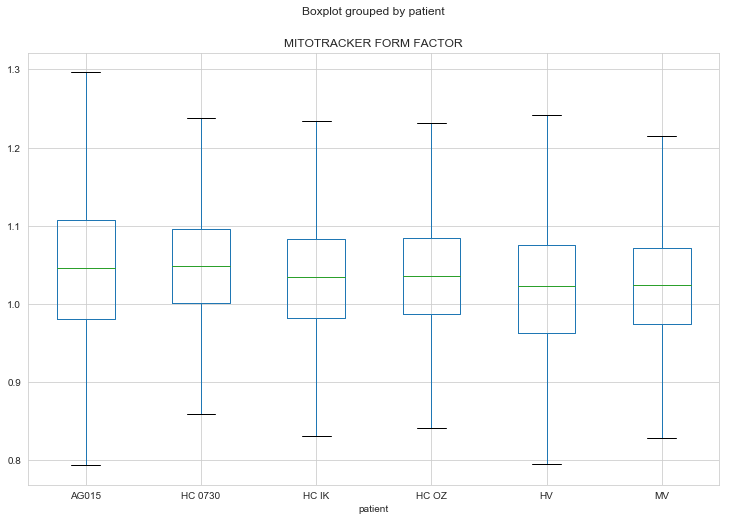

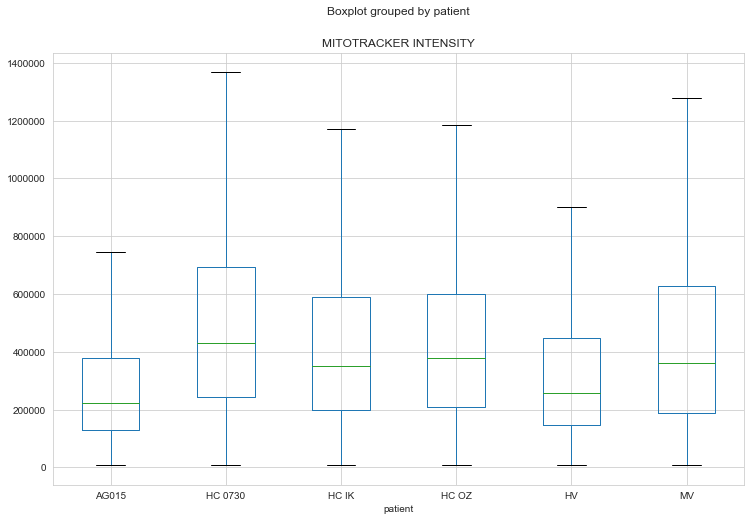

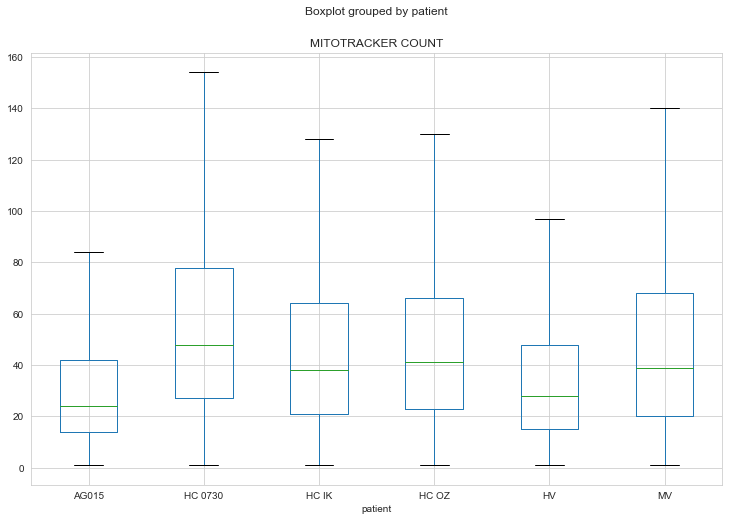

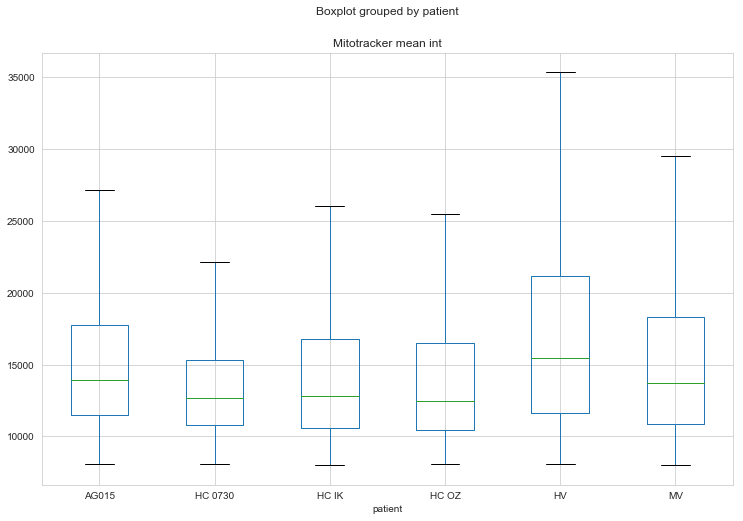

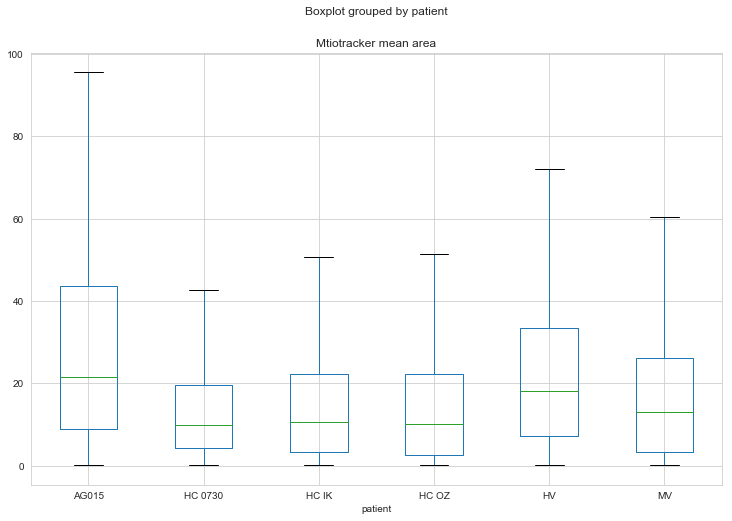

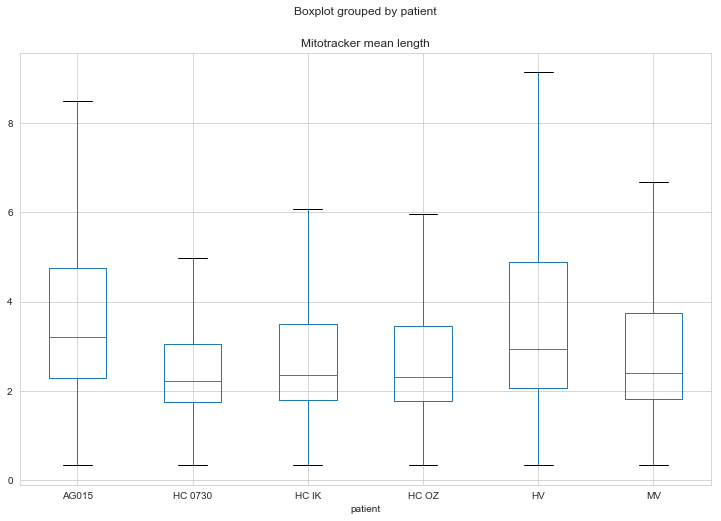

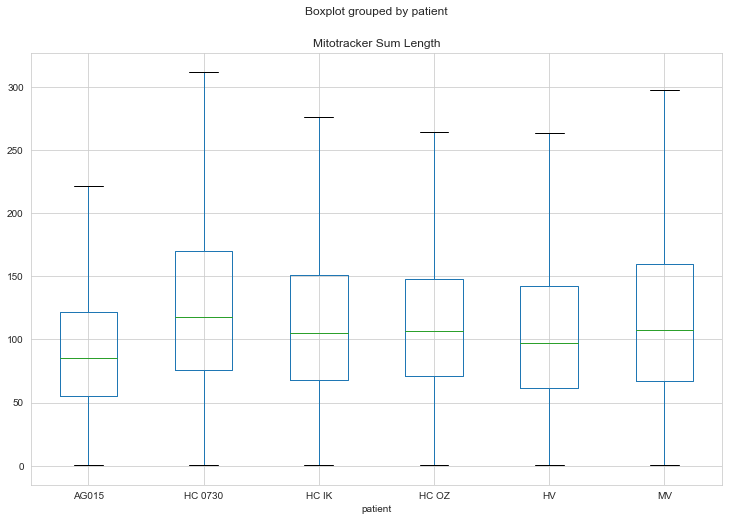

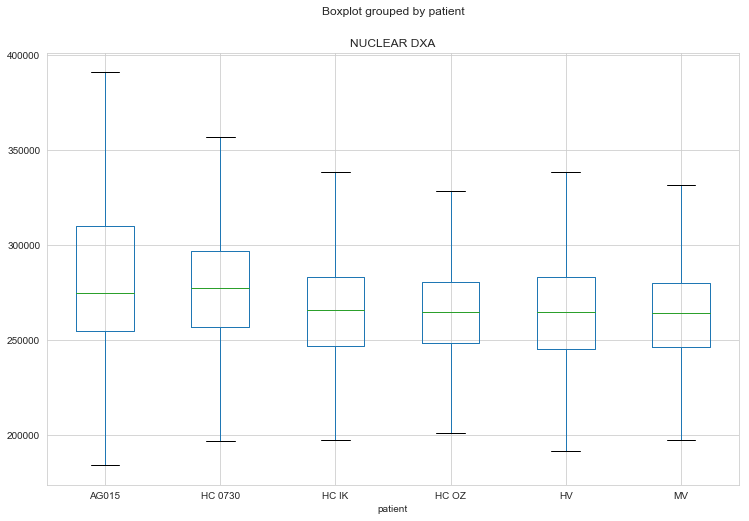

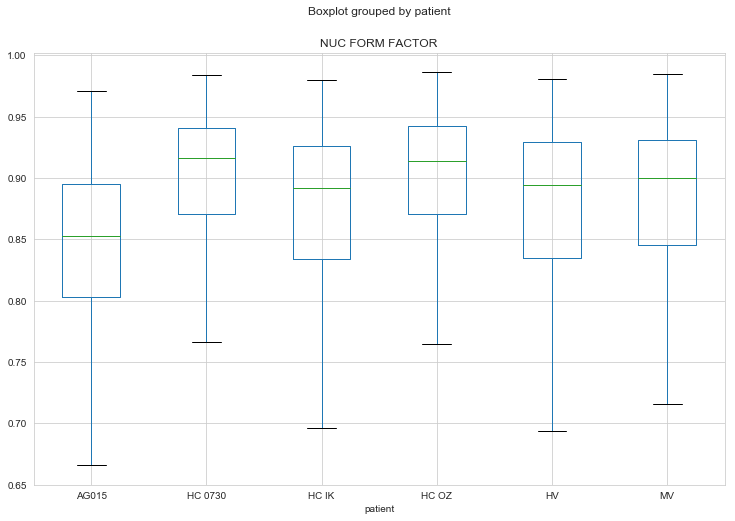

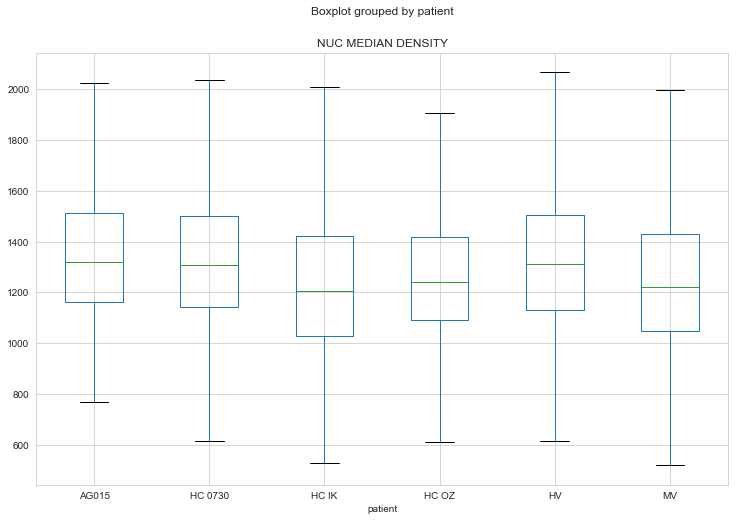

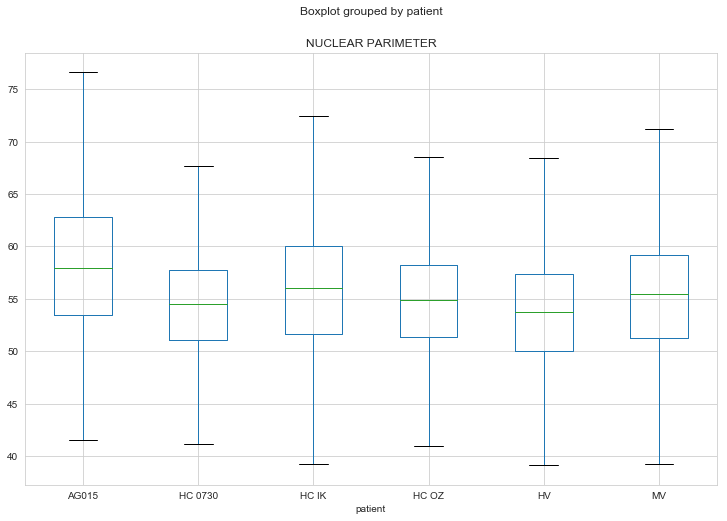

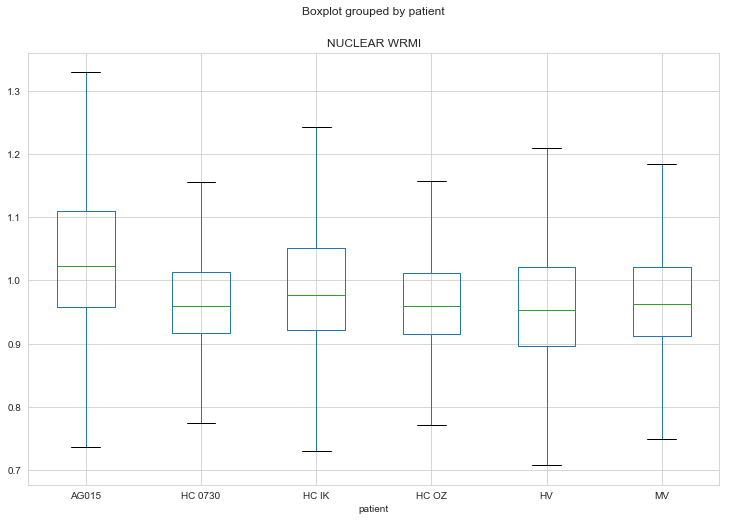

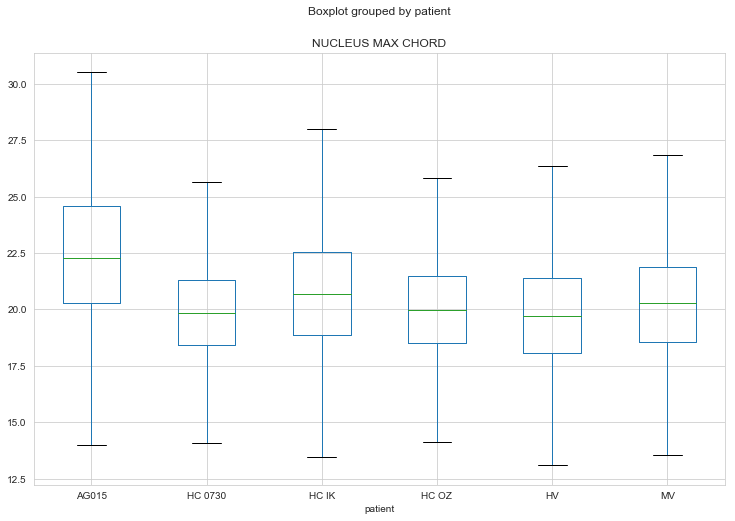

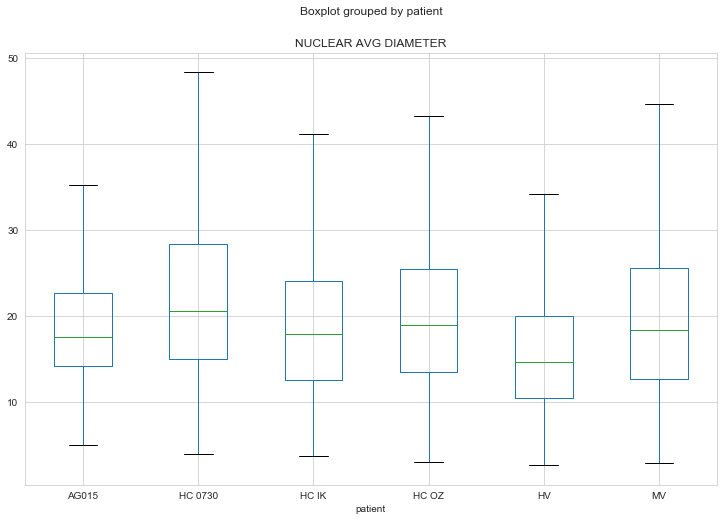

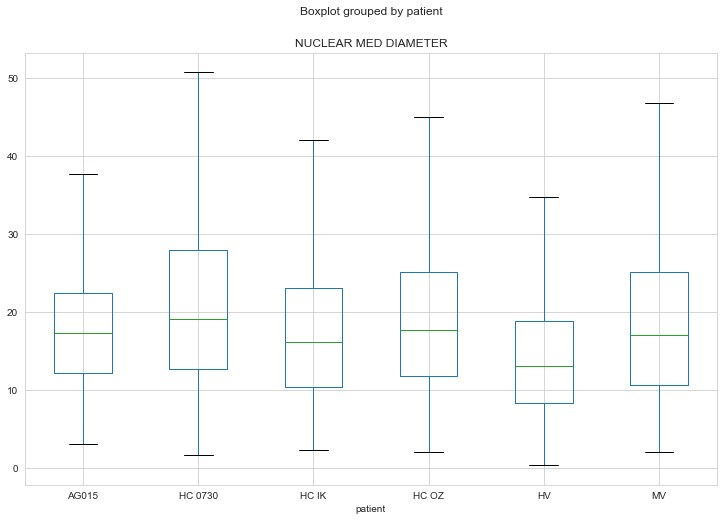

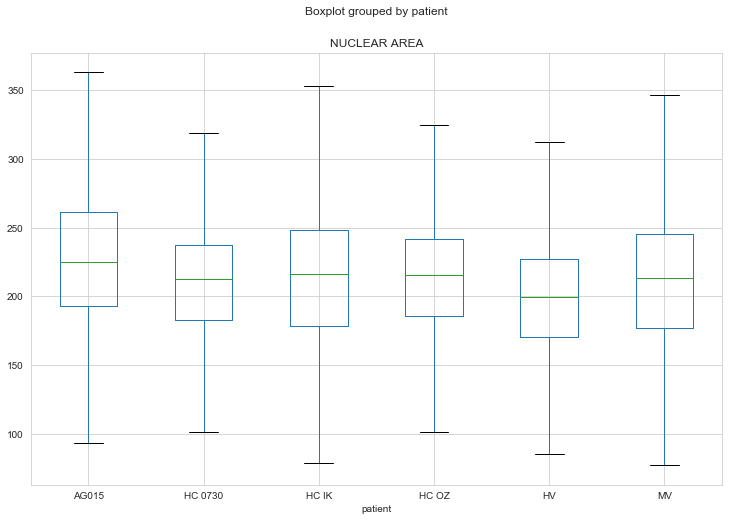

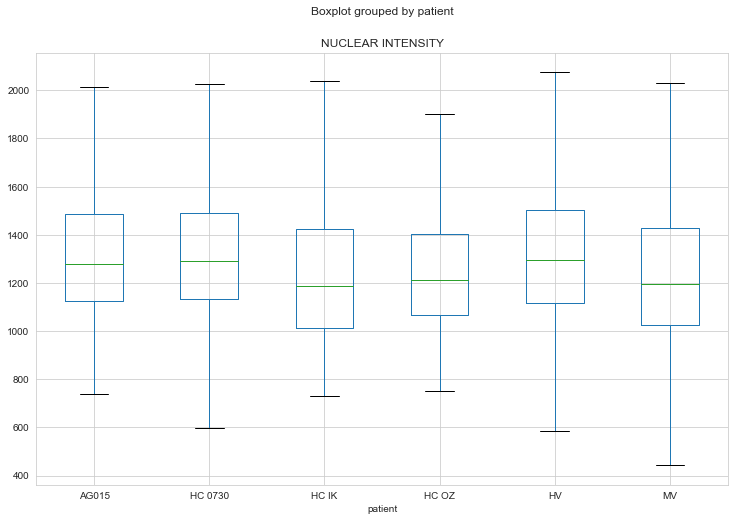

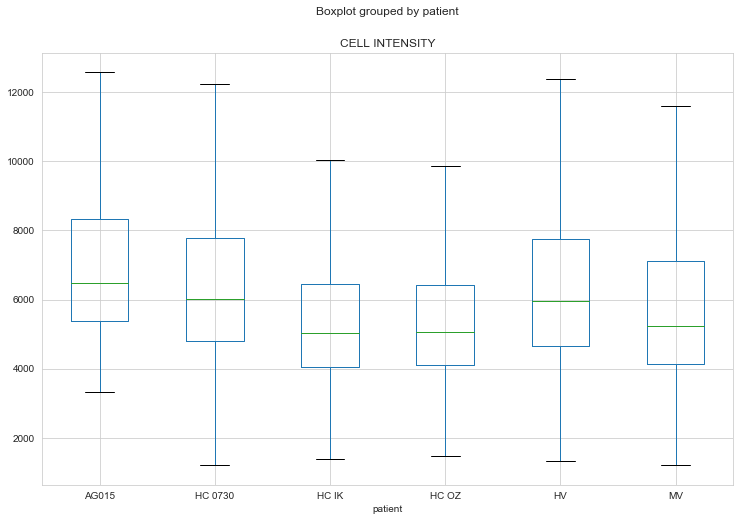

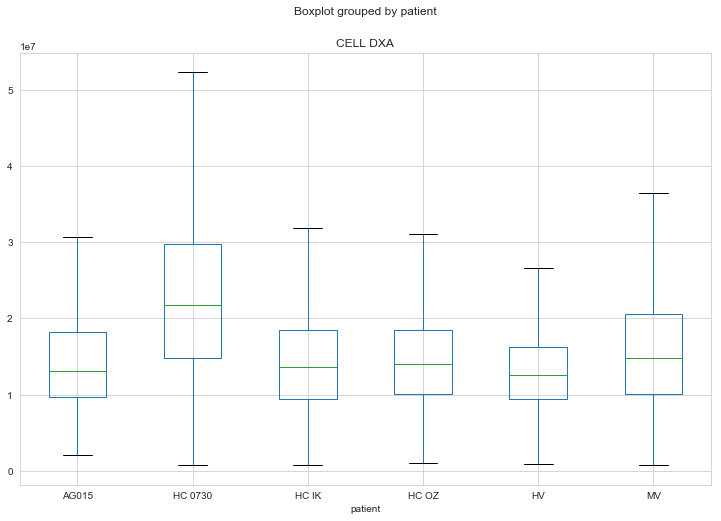

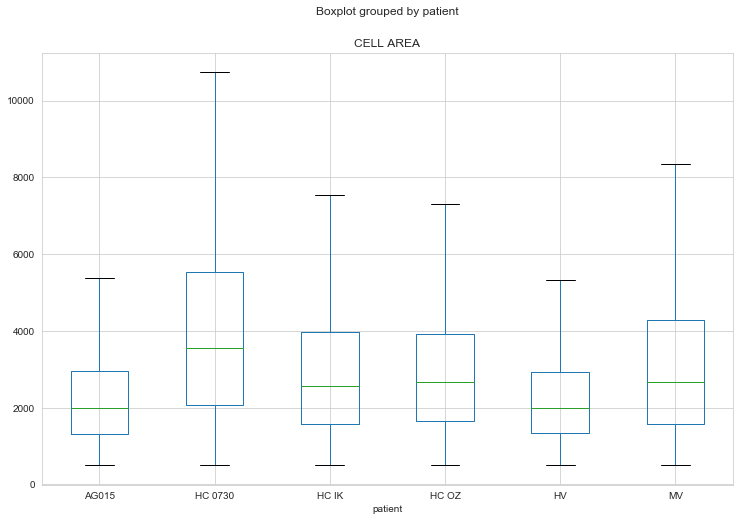

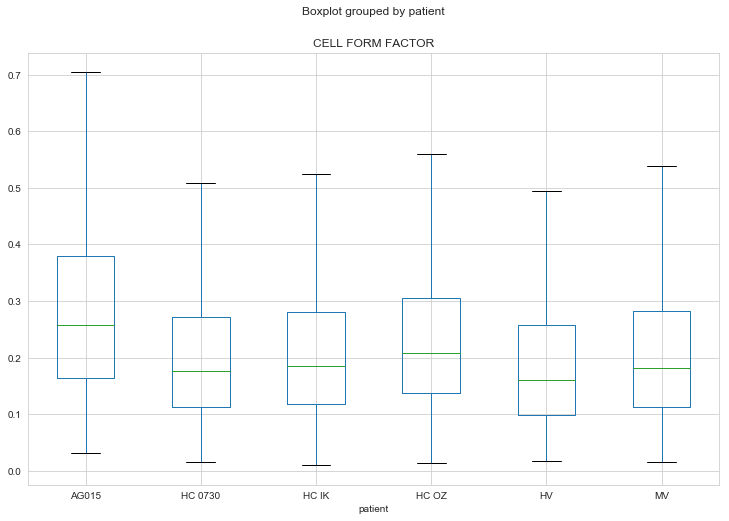

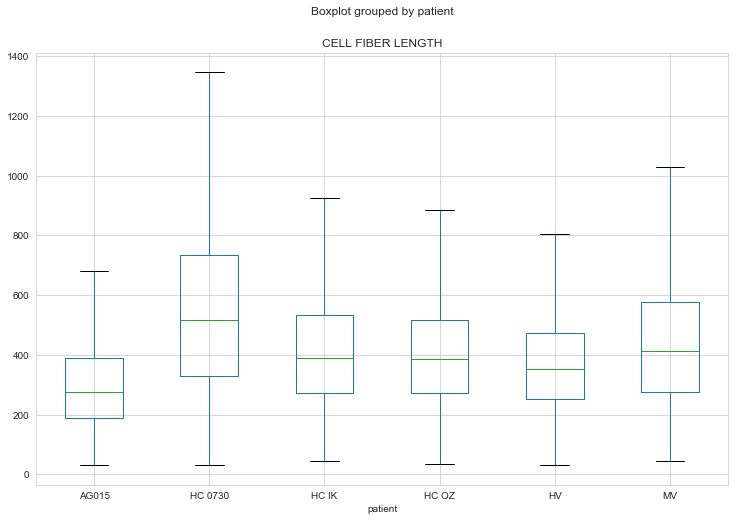

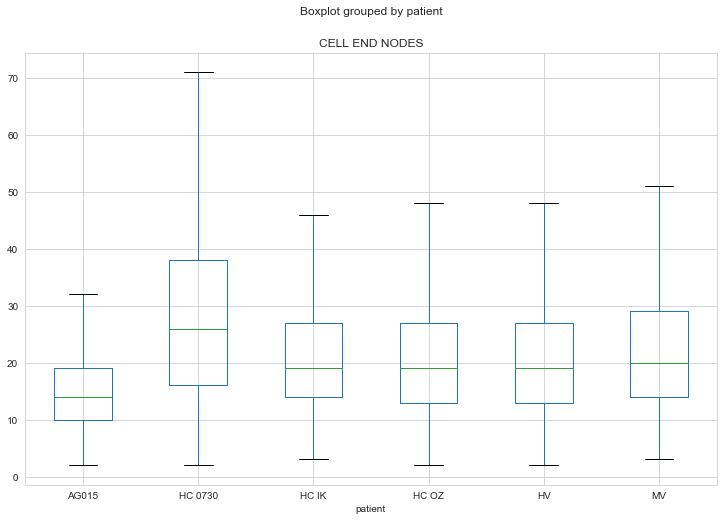

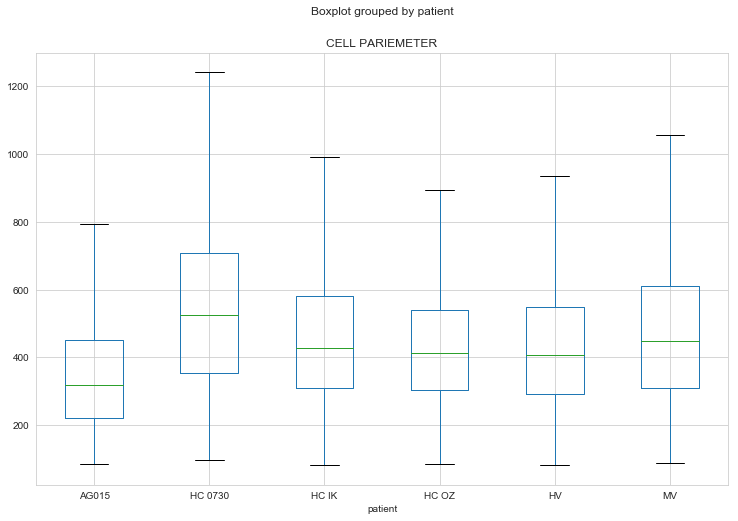

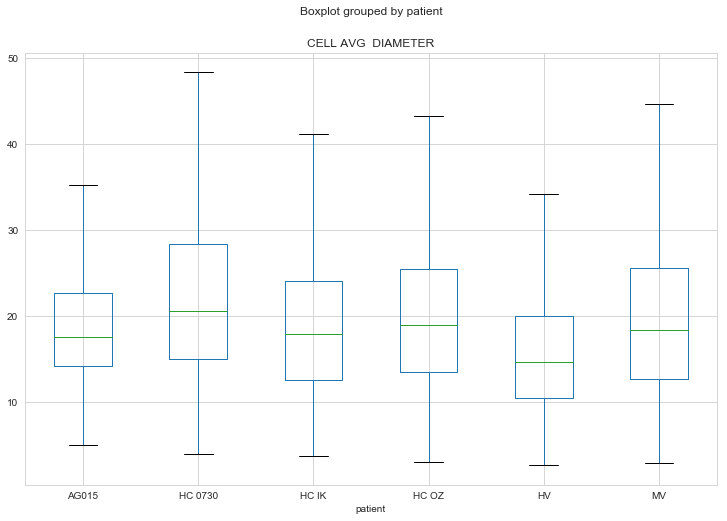

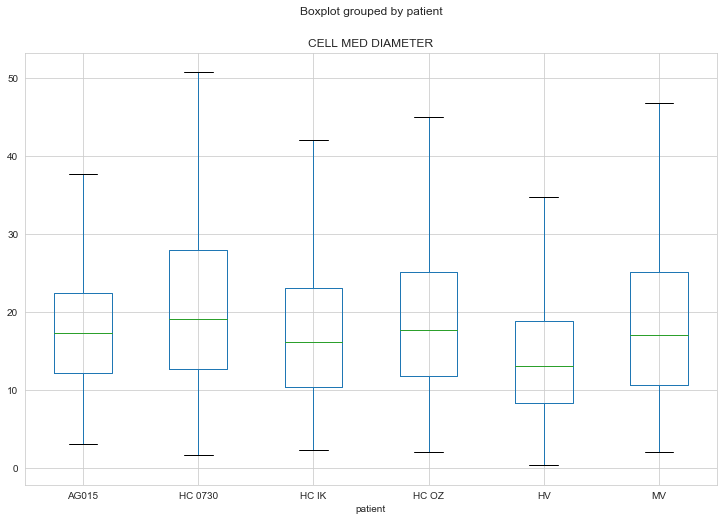

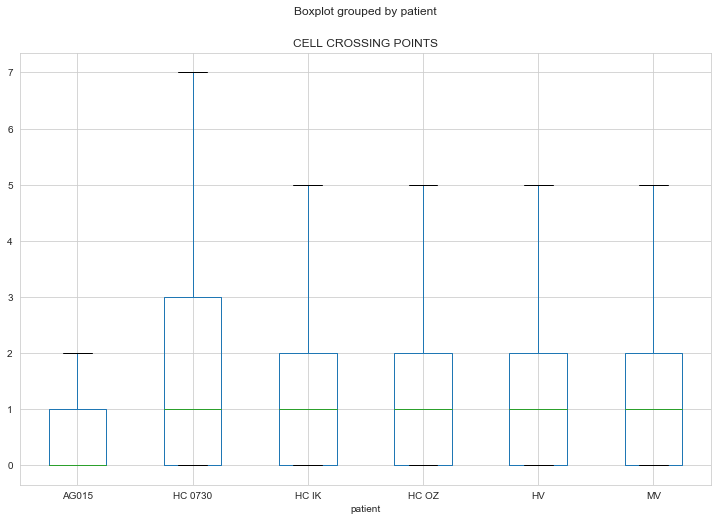

In [427]:
features_to_ignore = ['TMRE POS X', 'TMRE POS Y',
                      'MITO POS X', 'MITO POS Y',
                      'NUC CG X', 'NUC CG Y',
                      'Prow', 'Pcol', 'Pfield', 'Plate',
                      'patient', 'age','color', 'gender',]
 

for feature in df_live.columns:
    if feature in features_to_ignore:
        continue
    df_live.boxplot(column=feature, by='patient', showfliers=False)

What was the correction effect?  
*bold line is the corrected boxplot*

In [441]:
ax = df_live.boxplot(column='MITOTRACKER INTENSITY', by='patient', return_type='axes', showfliers=False)

boxprops = dict(linestyle='--', linewidth=2.5)
medianprops = dict(linestyle='-', linewidth=2.5)

df_live.boxplot(column="MITOTRACKER INTENSITY_Corrected",by="patient", ax=ax, boxprops=boxprops,medianprops=medianprops, showfliers=False )

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2257: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


### Normalized Values

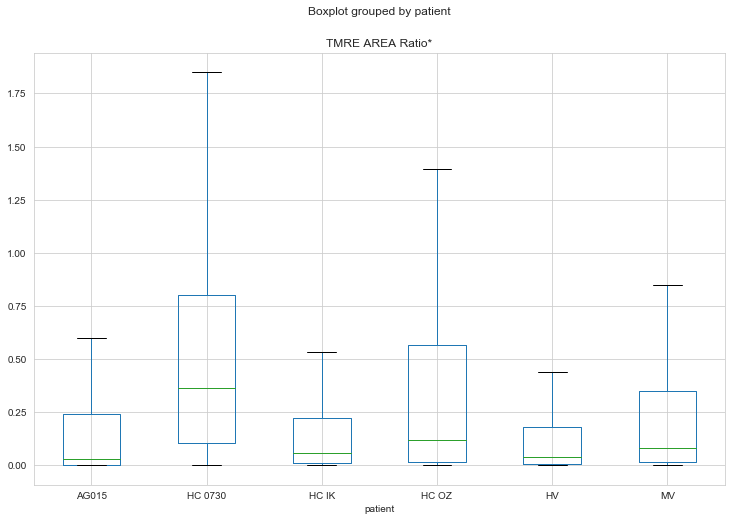

In [442]:
df_live['TMRE AREA Ratio*'] = df_live['TMRE AREA']/df_live['MITOTRECKER AREA']
df_live.boxplot(column='TMRE AREA Ratio*', by='patient', showfliers=False)

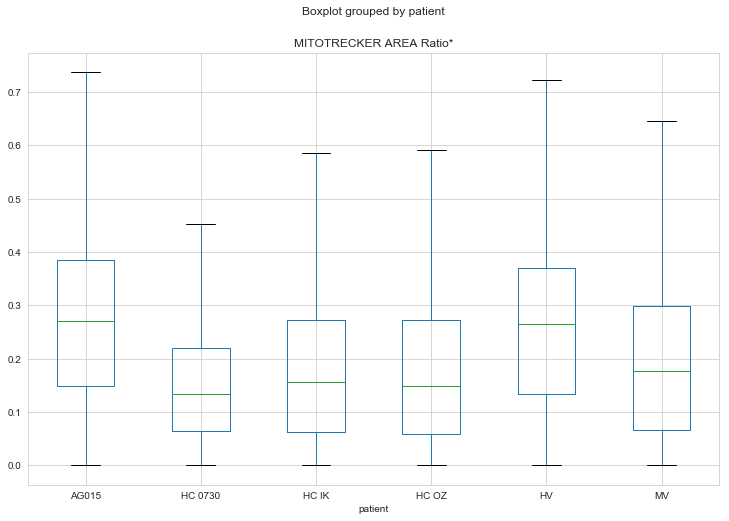

In [443]:
df_live['MITOTRECKER AREA Ratio*'] = df_live['MITOTRECKER AREA']/df_live['CELL AREA']
df_live.boxplot(column='MITOTRECKER AREA Ratio*', by='patient', showfliers=False)

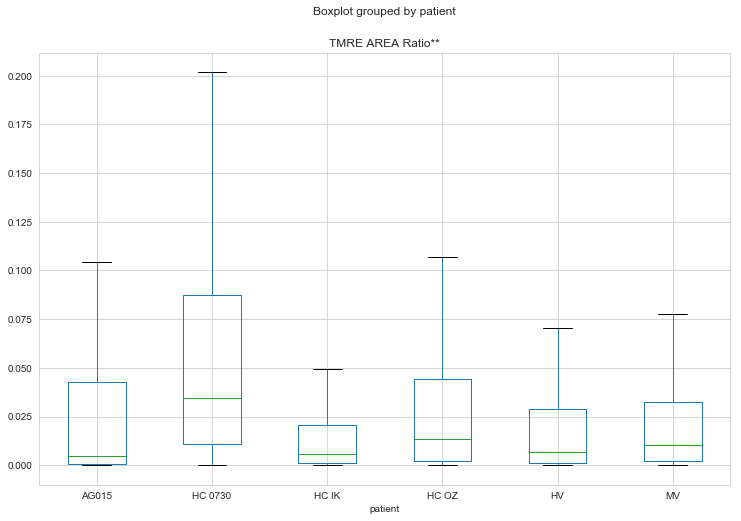

In [444]:
df_live['TMRE AREA Ratio**'] = df_live['TMRE AREA']/df_live['CELL AREA']
df_live.boxplot(column='TMRE AREA Ratio**', by='patient', showfliers=False)

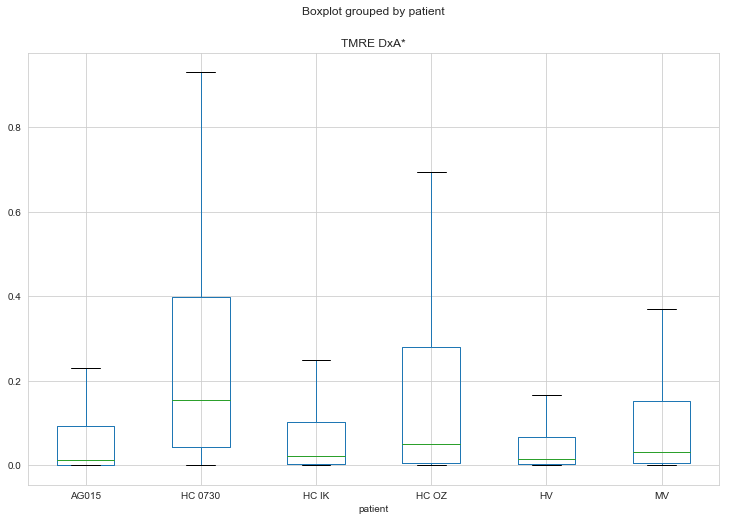

In [445]:
df_live['TMRE DxA*'] = df_live['TMRE DxA']/df_live['MITOTRACKER DxA']
df_live.boxplot(column='TMRE DxA*', by='patient', showfliers=False)

In [ ]:
df_live['TMRE DxA**'] = df_live['TMRE DxA']/df_live['CELL DXA']
df_live.boxplot(column='TMRE DxA**', by='patient', showfliers=False)

In [ ]:
df_live['TMRE INTENSITY*'] = df_live['TMRE INTENSITY_Corrected']/df_live['MITOTRACKER INTENSITY_Corrected']
df_live.boxplot(column='TMRE INTENSITY*', by='patient', showfliers=False)

<div class="alert alert-info" role="alert">
  From what I see live cells does not seem to show clear differences between controls and Alon or Ella  
</div>

# Unification of plates

The estimation is that for various features we will find the feature similar for the same person and NOT for others

In [446]:
df_live.columns

Index(['TMRE AREA', 'TMRE POS X', 'TMRE POS Y', 'TMRE INTENSITY', 'TMRE FORM FACTOR', 'TMRE COUNT', 'TMRE DxA', 'TMRE mean int', 'TMRE mean area', 'TMRE mean length', 'TMRE Sum Length', 'MITOTRECKER AREA', 'MITO POS Y', 'MITOTRACKER DxA', 'MITOTRACKER FORM FACTOR', 'MITOTRACKER INTENSITY', 'MITOTRACKER COUNT', 'MITO POS X', 'Mitotracker mean int', 'Mtiotracker mean area', 'Mitotracker mean length', 'Mitotracker Sum Length', 'NUCLEAR DXA', 'NUC CG X', 'NUC CG Y', 'NUC FORM FACTOR', 'NUC MEDIAN DENSITY', 'NUCLEAR PARIMETER', 'NUCLEAR WRMI', 'NUCLEUS MAX CHORD', 'NUCLEAR AVG DIAMETER', 'NUCLEAR MED DIAMETER', 'NUCLEAR AREA', 'NUCLEAR INTENSITY', 'CELL INTENSITY', 'CELL DXA', 'CELL AREA', 'CELL FORM FACTOR', 'CELL FIBER LENGTH', 'CELL END NODES', 'CELL PARIEMETER', 'CELL AVG  DIAMETER', 'CELL MED DIAMETER', 'CELL FRMI', 'CELL LENGTH', 'CELL CROSSING POINTS', 'CELL BRANCH NODES', 'Plate', 'Prow', 'Pcol', 'Pfield', 'patient', 'age', 'color', 'gender', 'Mitotracker mean int_Corrected',
      

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


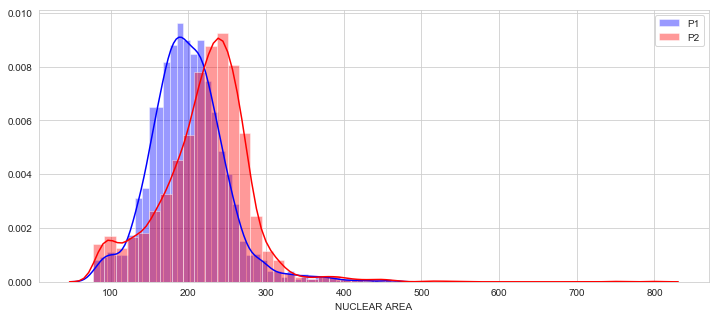

In [453]:
# Create a figure of given size
fig = plt.figure(figsize=(12,5))
# Add a subplot
ax = fig.add_subplot(111)

sns.distplot(df_live.loc[(df_live.Plate==1) & (df_live.patient=='MV'), 'NUCLEAR AREA'], kde=True, ax=ax, color='b')
sns.distplot(df_live.loc[(df_live.Plate==2) & (df_live.patient=='MV'), 'NUCLEAR AREA'], kde=True ,ax=ax, color='r')
ax.legend(['P1','P2'])

In [454]:
from scipy import stats

patients_names = df_live.patient.unique()
feature = 'CELL AREA'

feature_plate_unification = pd.DataFrame()
for patient1 in patients_names:
    for patient2 in patients_names:    
        p1 = df_live.loc[(df_live.Plate==1) & (df_live.patient==patient1), feature]
        p2 = df_live.loc[(df_live.Plate==2) & (df_live.patient==patient2), feature]
        stat, p_val = stats.ks_2samp(p1, p2)
        feature_plate_unification.loc[patient1,patient2] = p_val

# for patient1 in patients_names:
#     feature_plate_unification[patient1] = pval_corrected(feature_plate_unification[patient1].values)

# for patient2 in patients_names:
#     feature_plate_unification.loc[:,patient2] = pval_corrected(feature_plate_unification.loc[:,patient2].values)

display(feature_plate_unification.style.format("{:.3%}"))

In [449]:
# aaa=pval_corrected(feature_plate_unification.values.reshape((1,feature_plate_unification.shape[0]**2))[0])
# aaa = aaa.reshape((feature_plate_unification.shape[1],feature_plate_unification.shape[1]))
# feature_plate_unification = feature_plate_unification.from_records(aaa)
# display(feature_plate_unification.style.format("{:.2%}"))

In [450]:
patients_names = df_live.patient.unique()
feature = 'CELL AREA'

feature_plate_unification = pd.DataFrame()
for patient1 in patients_names:
    for patient2 in patients_names:    
        p1 = df_live.loc[(df_live.Plate==1) & (df_live.patient==patient1), feature]
        p2 = df_live.loc[(df_live.Plate==2) & (df_live.patient==patient2), feature]
        stat, p_val = mannwhitneyu(p1, p2)
        feature_plate_unification.loc[patient1,patient2] = p_val

# for patient1 in patients_names:
#     feature_plate_unification[patient1] = pval_corrected(feature_plate_unification[patient1].values)

# for patient2 in patients_names:
#     feature_plate_unification.loc[:,patient2] = pval_corrected(feature_plate_unification.loc[:,patient2].values)

display(feature_plate_unification.style.format("{:.2%}"))